In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [54]:
df = pd.read_csv('ratings_Electronics.csv')

df.columns=['userId','productId','rating','timestamp']
display(df[0:5])
print(len(df))

,userId,productId,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


7824481


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from surprise import Dataset, Reader, SVD,NormalPredictor, accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split as surprise_train_test_split


In [5]:
#Total Users/Products
print(len(df['userId'].unique().tolist()))
print(len(df['productId'].unique().tolist()))

4201696
476001


In [6]:
df.describe()

,rating,timestamp
count,7.824481e+06,7.824481e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [7]:
df.isnull().sum()

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'timestamp'}>]], dtype=object)

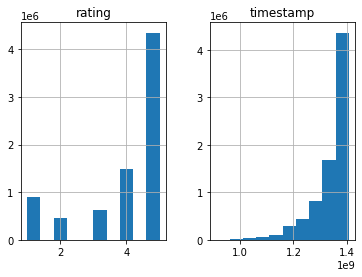

In [8]:
df.hist()

In [9]:
len(np.unique(df.userId))

4201696

In [10]:
len(np.unique(df.productId))

476001

###Surprise module for Rec system algorithms - start with SVD then explore others to improve performance###

In [5]:
train_df, test_df = surprise_train_test_split(data, test_size=0.30)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [55]:

df.drop('timestamp',axis=1, inplace=True)
df.drop_duplicates(inplace=True)

In [56]:
df.shape

(7824481, 3)

In [16]:
df.groupby('userId').size().sort_values(ascending=False)

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A2HRB8UOXH92SQ      1
A2HRBA4HO2E4GU      1
A2HRBCM00IDK56      1
A2HRBEBDTIB8MT      1
AZZZY1W55XHZR       1
Length: 4201696, dtype: int64

In [ ]:
df.groupby('productId').size().sort_values(ascending=False)

In [19]:
rating_counts = df.userId.value_counts()

In [20]:
df_10 = df[df.userId.isin(rating_counts[rating_counts>=10].index)]

In [23]:
df_10.shape

(1089763, 3)

In [21]:
most_rated=df_10.groupby('userId').size().sort_values(ascending=False)

In [25]:
most_rated.describe().astype(int).T

count    63175
mean        17
std         14
min         10
25%         11
50%         13
75%         18
max        520
dtype: int32

C:\Users\erice\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


<AxesSubplot:>

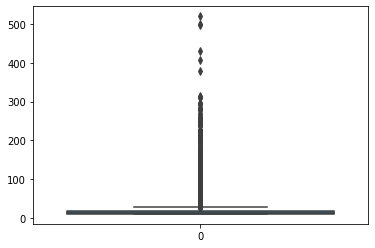

In [26]:
sns.boxplot(data=most_rated)

In [28]:
quantiles = most_rated.quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantiles

0.00     10
0.01     10
0.02     10
0.03     10
0.04     10
       ... 
0.96     40
0.97     46
0.98     54
0.99     72
1.00    520
Length: 101, dtype: int64

In [31]:
df.groupby(by=['rating']).agg({'userId': 'count'})

,userId
rating,
1.0,901765
2.0,456322
3.0,633073
4.0,1485781
5.0,4347540


In [38]:
df.groupby("productId")['rating'].count()

productId
0321732944     1
0439886341     3
0511189877     6
0528881469    27
0558835155     1
              ..
BT008G3W52     1
BT008SXQ4C     1
BT008T2BGK     1
BT008UKTMW    15
BT008V9J9U     1
Name: rating, Length: 476001, dtype: int64

[SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:

In [49]:
#Subsetting the data to keep products having at least 10 ratings
prod_ge_25=df.groupby("productId").filter(lambda x:x['rating'].count() >= 10)
#Subsetting the data to keep users who have given at least 25 ratings
user_ge_25=df.groupby("userId").filter(lambda x:x['rating'].count() >= 10)

In [50]:
user_ge_25.drop(['rating'],inplace=True,axis=1)
user_ge_25

,userId,productId
67013,A31N0XY2UTB25C,B001CIREXA
31599,A3FPSY1M6G7XIB,B000EW8074
232494,AEL6CQNQXONBX,B00BIFNTMC
137179,AOEAD7DPLZE53,B00478VMT4
19182,A5JLAU2ARJ0BO,B0002T3UPG
...,...,...
154788,A3EZFFPVS34AMO,B004TS2AP2
161585,A3PGVJF37JSHFO,B0054LK280
11343,A35X2JJI49OBZP,B00009RL1X
56505,A3MQAQT8C6D1I7,B0012GK3MQ


In [51]:
user_prod_ge_25 = pd.merge(prod_ge_25,user_ge_25)

In [53]:
user_prod_ge_25.shape

(313, 3)

In [45]:
df = user_prod_ge_25.sample(frac=0.10, replace=False, random_state=0)

In [46]:
reader = Reader(rating_scale=(1,5)) # rating scale range
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

In [47]:
#10 min runtime
algo1 = NormalPredictor()
# Run 5-fold cross-validation and print results.
cross_validate(algo1, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3972  1.4020  1.4253  1.4120  1.4098  1.4093  0.0096  
MAE (testset)     1.0477  1.0523  1.0658  1.0491  1.0509  1.0531  0.0065  
Fit time          0.02    0.01    0.01    0.01    0.02    0.01    0.00    
Test time         0.01    0.13    0.01    0.01    0.01    0.03    0.05    


{'test_rmse': array([1.39722543, 1.40203245, 1.42531881, 1.41197341, 1.40984339]),
 'test_mae': array([1.04772343, 1.05231457, 1.06575781, 1.04908936, 1.05085371]),
 'fit_time': (0.015015363693237305,
  0.013011693954467773,
  0.013011932373046875,
  0.013011932373046875,
  0.016014575958251953),
 'test_time': (0.01401209831237793,
  0.12711596488952637,
  0.011010169982910156,
  0.011009931564331055,
  0.011010408401489258)}

In [48]:
#10 min runtime
algo2 = SVD()
#algo = NormalPredictor()
# Run 5-fold cross-validation and print results.
cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0486  1.0857  1.0653  1.0724  1.0754  1.0695  0.0123  
MAE (testset)     0.8051  0.8269  0.8117  0.8203  0.8223  0.8173  0.0078  
Fit time          0.16    0.16    0.16    0.15    0.16    0.16    0.00    
Test time         0.02    0.02    0.02    0.02    0.02    0.02    0.00    


{'test_rmse': array([1.04862914, 1.08567824, 1.06527691, 1.07241521, 1.07544362]),
 'test_mae': array([0.80508223, 0.82694587, 0.81171477, 0.82028561, 0.82226808]),
 'fit_time': (0.15789437294006348,
  0.15514135360717773,
  0.15714263916015625,
  0.15313959121704102,
  0.15975475311279297),
 'test_time': (0.015014410018920898,
  0.017015695571899414,
  0.015013933181762695,
  0.017015933990478516,
  0.017016172409057617)}

In [8]:
algo2.fit(train_df)
predictions = algo2.test(test_df)

predictions[0:5]

[Prediction(uid='AH6YXK8ZC9G0V', iid='B000GSQDPM', r_ui=4.0, est=3.684305681620829, details={'was_impossible': False}),
 Prediction(uid='AEHQF0FMU0I90', iid='B004MF34S4', r_ui=1.0, est=3.556111097377663, details={'was_impossible': False}),
 Prediction(uid='A1WTXU5KXPB0RN', iid='B00316263Y', r_ui=5.0, est=4.514744197565094, details={'was_impossible': False}),
 Prediction(uid='A2H4ODNURTUYB', iid='B001TIHS7U', r_ui=1.0, est=4.063174671559236, details={'was_impossible': False}),
 Prediction(uid='A2GDKFJ4JACTDJ', iid='B00AWKC0JM', r_ui=5.0, est=4.048760306689626, details={'was_impossible': False})]